In [1]:
print("hello")

hello


In [1]:
class Value: 

    def __init__(self, data, _children=(), _op = ''): 
        self.data = data 
        self._prev = set(_children)
        self._op = _op 
        
    def __repr__(self): 
        return f"Value(data={self.data})"

    def __add__(self, other): 
        return Value(self.data + other.data, (self, other), '+')


    def __mul__(self, other): 
        return Value(self.data * other.data, (self, other), '*')



In [2]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

In [3]:
print(a)

Value(data=2.0)


In [4]:
print(b)

Value(data=-3.0)


In [5]:
print(c)

Value(data=10.0)


In [27]:
# d = a + b
# d = a.__add__(b)
# print(d)

In [ ]:
# d = a * b 
# d = a.__mul__(b)
# print(d)

Value(data=-6.0)


In [51]:
# d = (a * b) + c 
# d = (a.__mul__(b)).__add__(c)
# print(d)

In [ ]:
# d = a * b 
# print(d)

Value(data=-6.0)


In [ ]:
# d = a * b + c
# (-6, 10), op = '+'

In [21]:
# d = a + b
# print(d)

In [22]:
# print(d._prev)
# print(d._op)

In [25]:
# d = a * b
# print(d)

In [26]:
# print(d._prev)
# print(d._op)

In [7]:
e = (a * b)
d = e + c 

In [32]:
print(d)

Value(data=4.0)


In [ ]:
# print(d._prev)
# print(d._op)

{Value(data=10.0), Value(data=-6.0)}
+


In [ ]:
# print(e)
# print(e._prev)
# print(e._op)

Value(data=-6.0)
{Value(data=-3.0), Value(data=2.0)}
*


In [ ]:
# !brew install graphviz
# !pip3 install graphviz

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)


In [9]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f  }" % (n.data,), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

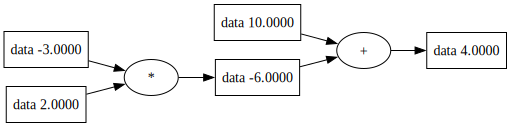

In [10]:
draw_dot(d)